# 8 CB Time Series Analysis

### This script contains the following points
#### 01 Import Libraries
#### 02 Import Data
#### 03 First Look at Data
#### 04 Time Series Analysis

# 01 Import Libraries

In [1]:
# Import Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# 02 Import Data

In [2]:
# Set a path

path = r'C:\Users\Tina\Desktop\CareerFoundry\Data Analytics Immersion\Chocolate Bar Rating'

In [3]:
# Import "checked_chocolate_bars"

choco_check = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'checked_chocolate_bars.csv'))

# 03 First Look at Data

In [4]:
# Shape of "choco_check"

choco_check.shape

(1722, 10)

In [5]:
# First few rows of "choco_check"

choco_check.head()

,Unnamed: 0,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [6]:
# Drop "Unnamed: 0" column

choco_check = choco_check.drop(columns =['Unnamed: 0'])

In [7]:
choco_check.head()

,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


# 04 Time Series Analysis

### 01 Create a subset

A subset needs to be created because the non-numerical columns can't be used in later steps.

In [8]:
# Create a subset with only the columns "review_date" and "rating"

choco_sub = choco_check[['review_date', 'rating']]

In [9]:
choco_sub.head()

,review_date,rating
0,2016,3.75
1,2015,2.75
2,2015,3.00
3,2015,3.50
4,2015,3.50


### 02 Aggregate the Data

In [10]:
# The data needs to be aggregated so that every year appears only once

choco_sub_agg = choco_sub.groupby(choco_sub['review_date']).mean()

In [11]:
choco_sub_agg

,rating
review_date,
2006,3.271930
2007,3.202899
2008,2.980556
2009,3.070796
2010,3.160550
2011,3.256369
2012,3.193122
2013,3.193370
2014,3.198312


The aggregation step already set the "review_date" as the index. But it doesn't have the correct data type yet.

### 03  Change Data Type of "review_date"

In [12]:
# Change the data type of "review_date" to datetime

choco_sub_agg.index = pd.to_datetime(choco_sub_agg.index, format='%Y')

In [13]:
choco_sub_agg

,rating
review_date,
2006-01-01,3.271930
2007-01-01,3.202899
2008-01-01,2.980556
2009-01-01,3.070796
2010-01-01,3.160550
2011-01-01,3.256369
2012-01-01,3.193122
2013-01-01,3.193370
2014-01-01,3.198312


### 03 Line Chart

Text(0, 0.5, 'Rating')

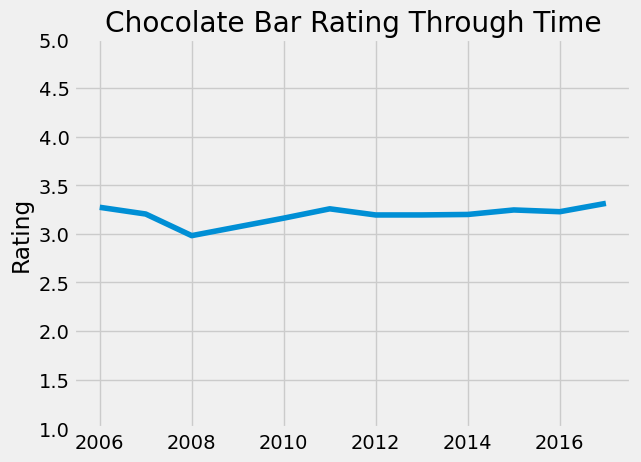

In [18]:
# Create a line chart of the data

line = sns.lineplot(data = choco_sub_agg, x = 'review_date', y = 'rating', ci = None)
plt.ylim(1,5)
plt.title('Chocolate Bar Rating Through Time')
plt.xlabel('')
plt.ylabel('Rating')

### 04 Decomposition

In [15]:
# Decompose the time series using an additive model

decom = sm.tsa.seasonal_decompose(choco_sub_agg, model='additive')

In [16]:
# Define a fixed size for all special charts

from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

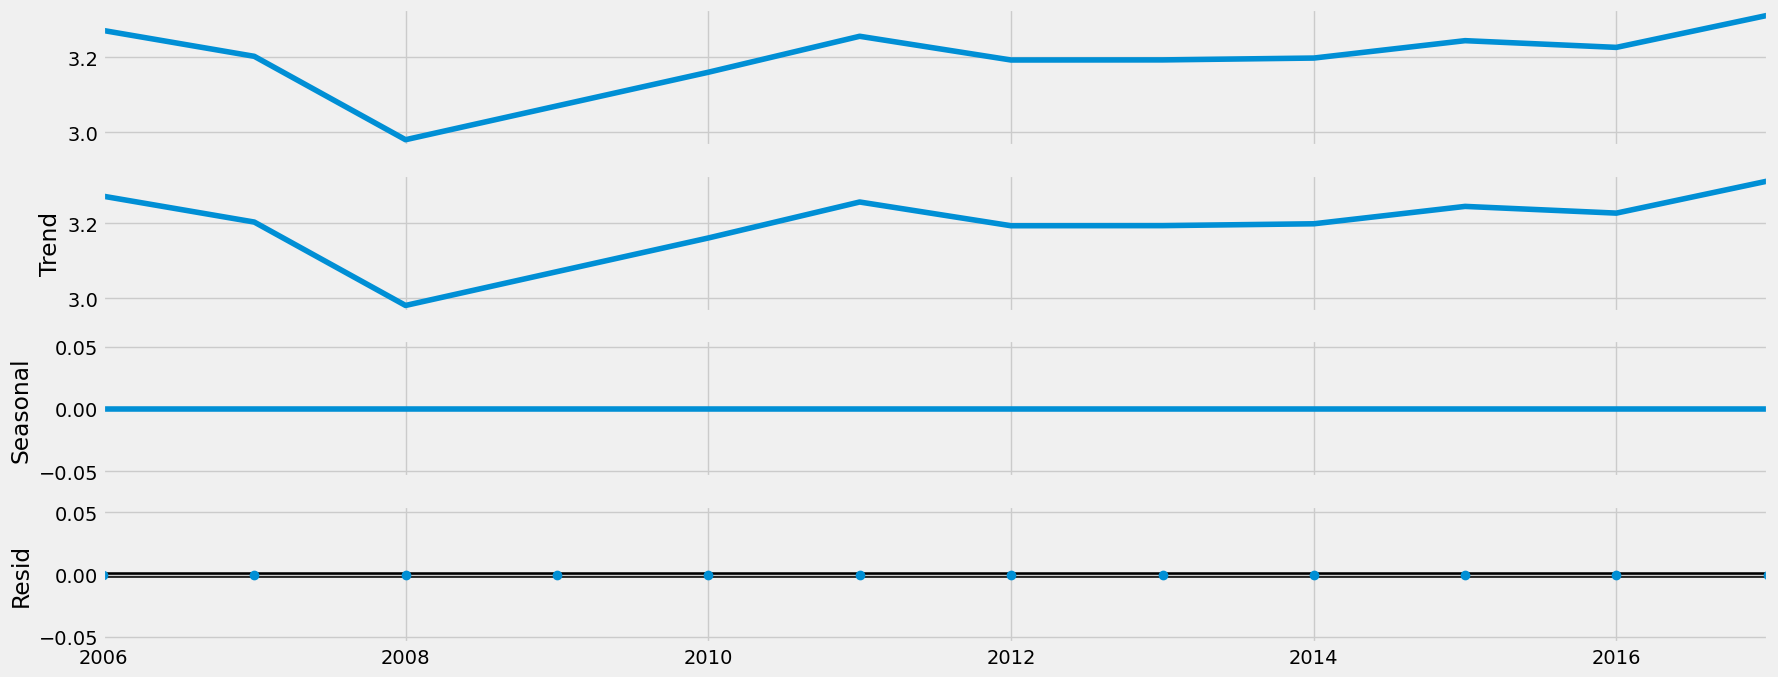

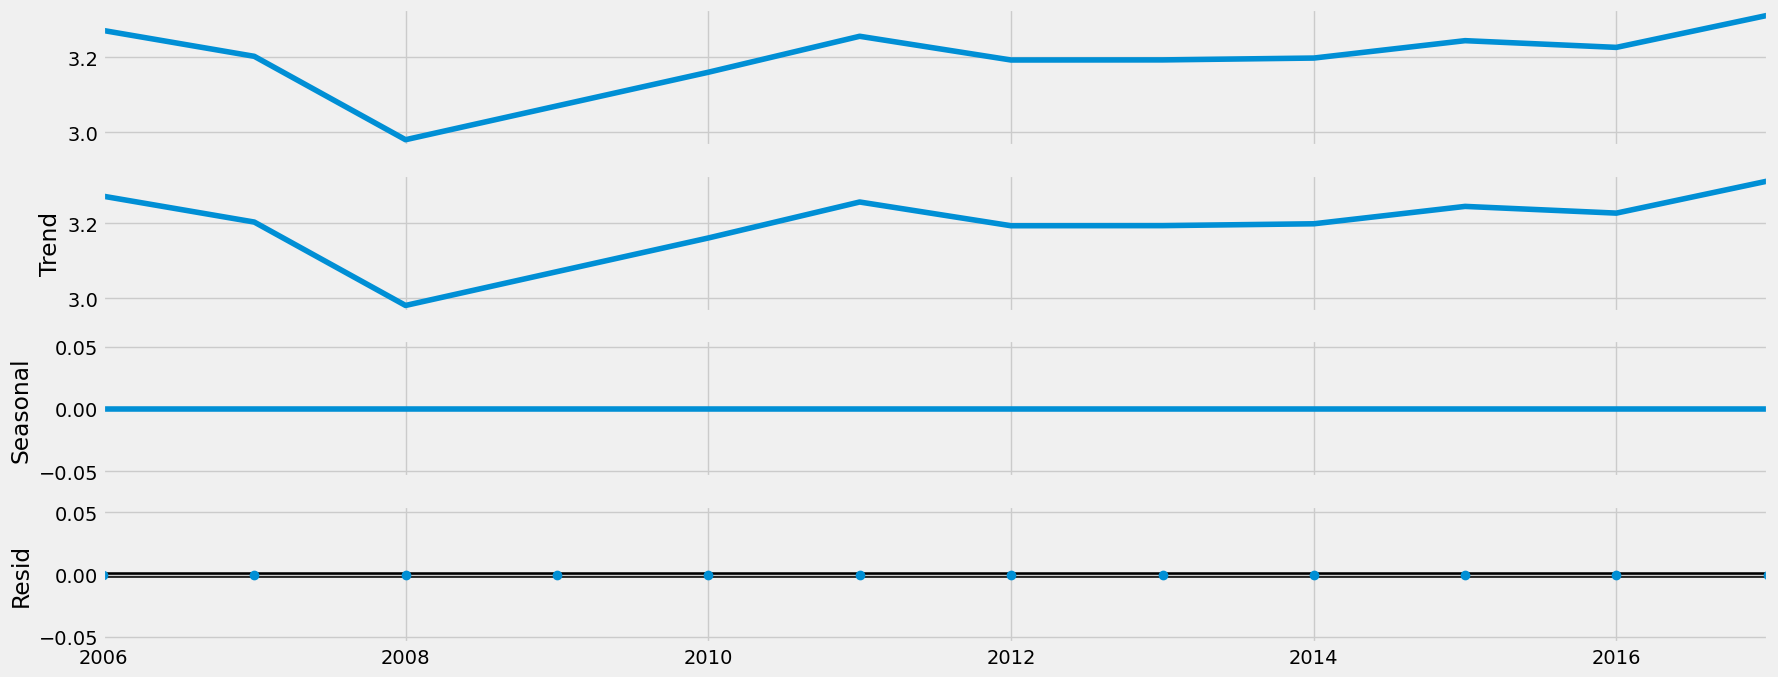

In [18]:
# Plot the decomposed components

decom.plot()

The first chart representing the data itself and the chart of the trend are the same for this data set. The trend changes a couple times. From 2006 to 2008 it goes down, until 2011 it goes up and from then on it seems to fluctuate very slowly.
The seasonal chart is completely flat which indicates that there is no seasonality in this data which makes sense because chocolate ratings aren't bound to any seasons.
The noise is a flat chart as well which means that there is no unexplained noise.

### 05 Dickey-Fuller Test for Stationarity

In [19]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

In [20]:
# Define a function that performs the Dickey-Fuller test

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [22]:
# Apply the test on "choco_sub_agg"

dickey_fuller(choco_sub_agg['rating'])

Dickey-Fuller Stationarity test:
Test Statistic                -0.952940
p-value                        0.770039
Number of Lags Used            4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


The test statistic is larger than any of the critical values which means that the null hypothesis ("There is a unit root in my data") cannot be rejected.
This means that my data is non-stationary and before a forecast can be done, the data needs to be transformed to stationary.

### 06 Differencing

In [24]:
# Subtract previous data point from current data point

choco_diff = choco_sub_agg - choco_sub_agg.shift(1)

In [26]:
# Remove missing values

choco_diff.dropna(inplace = True)

In [28]:
choco_diff

,rating
review_date,
2007-01-01,-0.069031
2008-01-01,-0.222343
2009-01-01,0.090241
2010-01-01,0.089754
2011-01-01,0.095819
2012-01-01,-0.063248
2013-01-01,0.000248
2014-01-01,0.004942
2015-01-01,0.046350


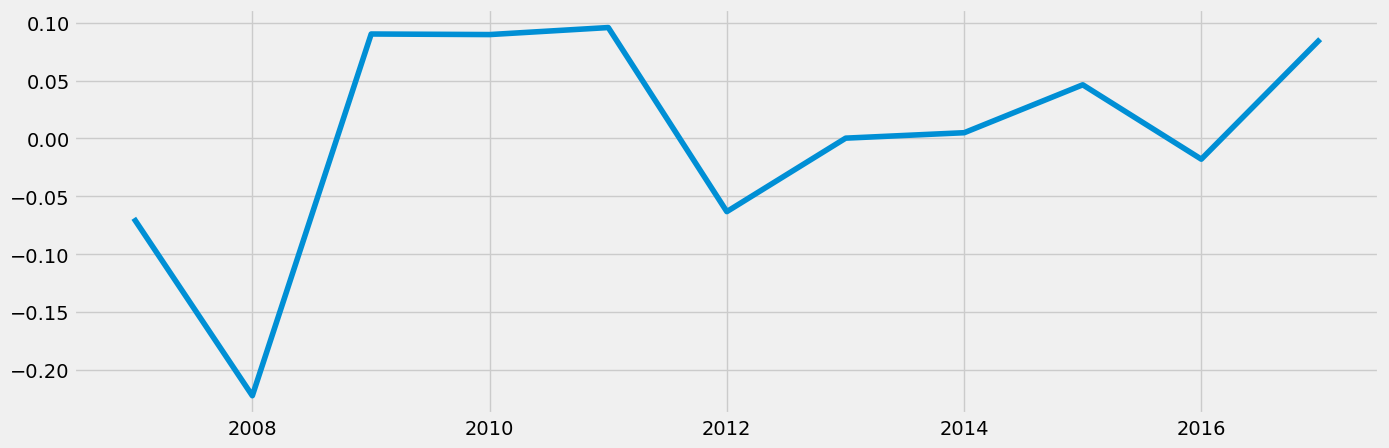

In [29]:
# Plot the new time series

plt.figure(figsize=(15,5), dpi=100)
plt.plot(choco_diff)

In [30]:
# Apply the Dickey-Fuller test again

dickey_fuller(choco_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.929526e+00
p-value                        2.398963e-07
Number of Lags Used            2.000000e+00
Number of Observations Used    8.000000e+00
Critical Value (1%)           -4.665186e+00
Critical Value (5%)           -3.367187e+00
Critical Value (10%)          -2.802961e+00
dtype: float64


Now the test statistic is smaller than the critical values which means that the null hypothesis can be rejected and there no longer is a unit root. The data has become stationary.

### 07 Autocorrelation

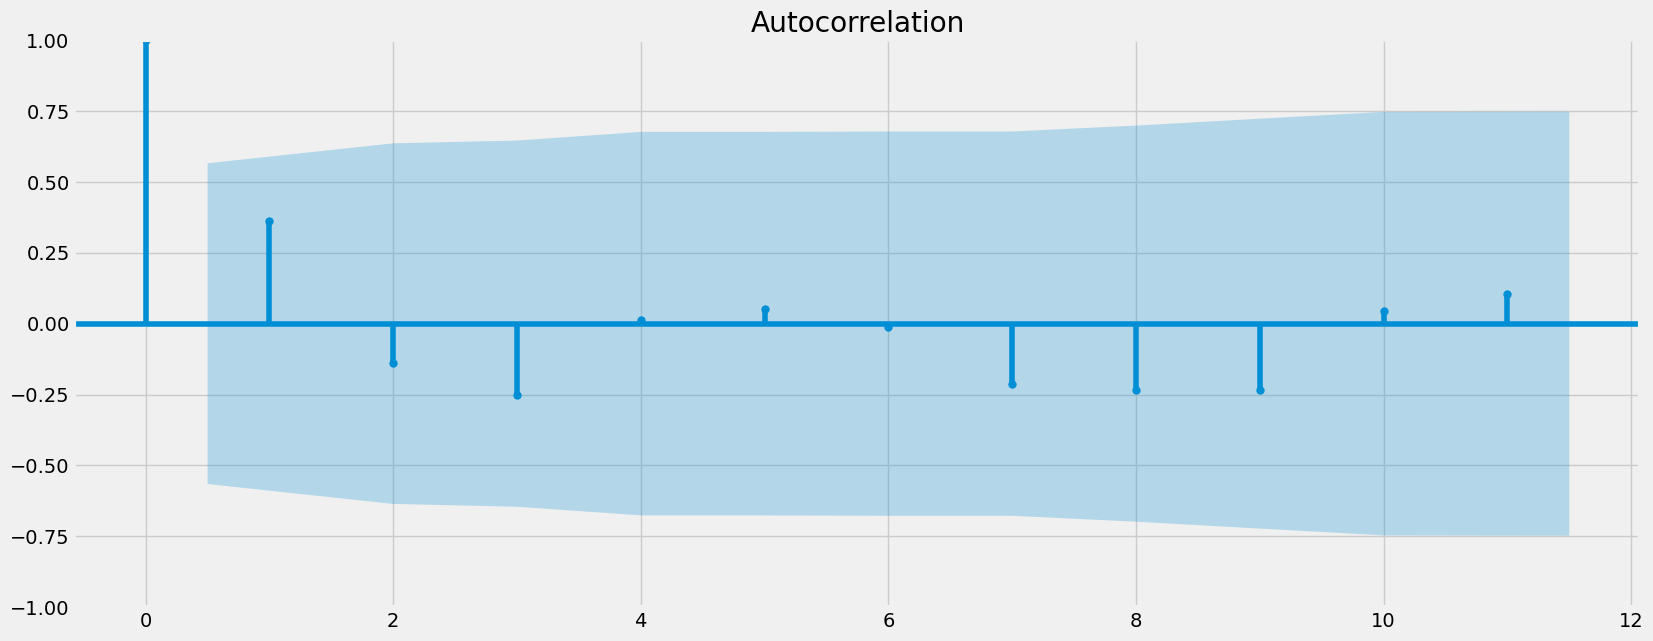

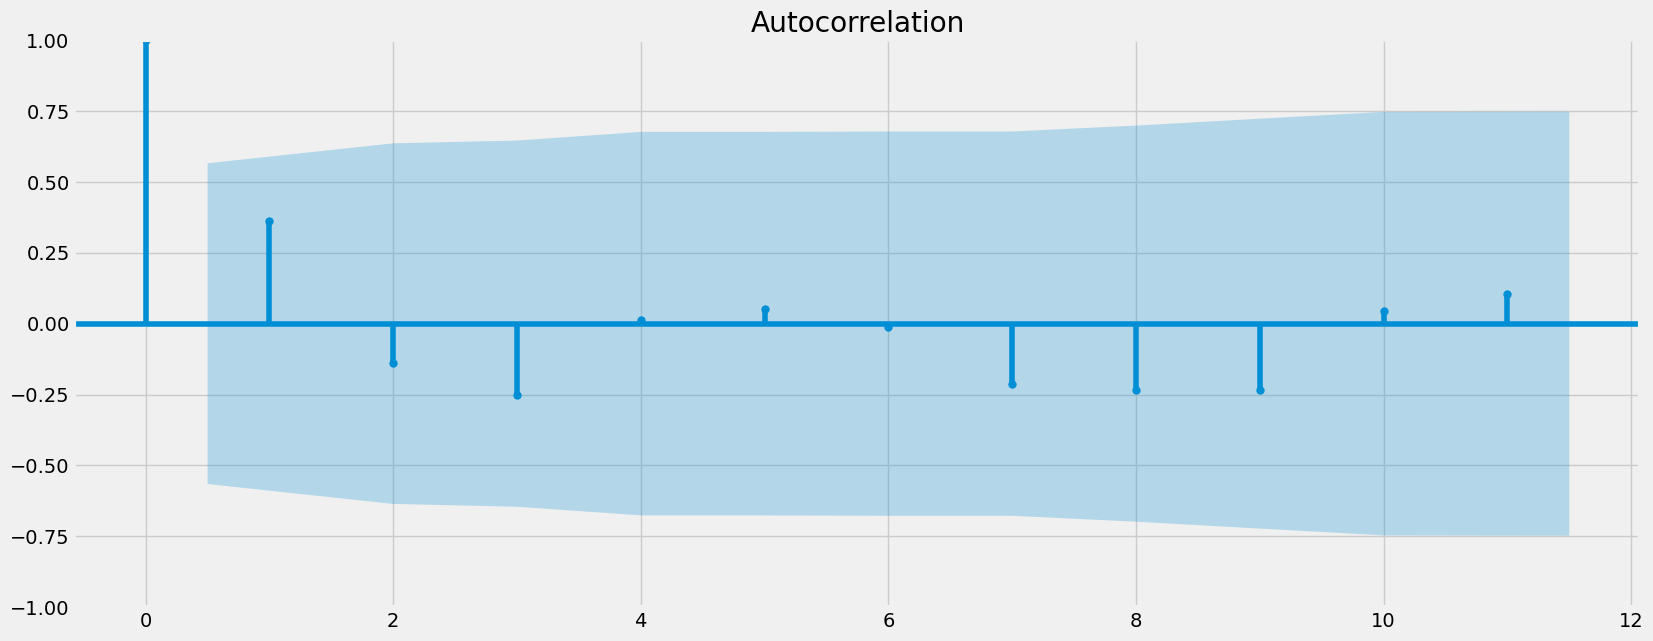

In [32]:
# Plot the autocorrelations of the data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(choco_sub_agg)

All lags but one are within the confidence intervall. This means that there is not a lot of autocorrelated data.